![Ontario Market](LogoOntarioMarket.png)
# <p style="background-color:#29285D;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Ontario Market - Proyecto Final </p>

El análisis de los clientes ayuda a modificar un producto en función a los diferentes segmentos de ellos. Por ejemplo, desarrollar estrategias de ventas enfocadas a los clientes de mayor potencial, y con productos especificos.

En la siguiente sección, iremos a través de un proyecto de ciencia de datos sobre el análisis de los clientes con python, buscando predecir aquellos que sean potencialmente aceptadores de las campañas de marketing, todo esto con datos recopilados de datos personales y desde las ventas para tener un amplio panorama del comportamiento.

## Diccionario de Variables

#### People
1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
11. MntWines: Amount spent on wine in last 2 years
12. MntFruits: Amount spent on fruits in last 2 years
13. MntMeatProducts: Amount spent on meat in last 2 years
14. MntFishProducts: Amount spent on fish in last 2 years
15. MntSweetProducts: Amount spent on sweets in last 2 years
16. MntGoldProds: Amount spent on gold in last 2 years

#### Promotion
17. NumDealsPurchases: Number of purchases made with a discount
18. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
19. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
20. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
21. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
22. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
23. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place
24. NumWebPurchases: Number of purchases made through the company’s website
25. NumCatalogPurchases: Number of purchases made using a catalogue
26. NumStorePurchases: Number of purchases made directly in stores
27. NumWebVisitsMonth: Number of visits to company’s website in the last month

## Pasos de este estudio
1. Indicación de la fuente del dataset
1. Carga de datos
1. Exploración de datos
1. Procesamiento de datos
1. Análisis exploratorio de datos
1. Preparación de datos
1. Entrenamiento de modelos supervisados
1. Optimización de parámetros
1. Evaluación del modelo seleccionado
1. Conclusión

## <p style="background-color:#29285D;font-family:verdana;color:white;font-size:100%;text-align:left;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 1. Fuente del dataset </p>
https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv

## <p style="background-color:#29285D;font-family:verdana;color:white;font-size:100%;text-align:left;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 2. Carga de datos </p>

In [1]:
#Importar librerias
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#Lectura de datos
data = pd.read_csv('marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## <p style="background-color:#29285D;font-family:verdana;color:white;font-size:100%;text-align:left;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 3. Exploración de datos </p>

In [3]:
#Dimensiones del dataset
print(f'Este data set tiene {str(data.shape[0])} filas, y {str(data.shape[1])} columnas')

Este data set tiene 2240 filas, y 29 columnas


In [4]:
#Columnas del dataset
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
#Tipo de datos y cantidad de No Nulos por columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
#Distribución de las variables numericas
data.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.2,3246.7,0.0,2828.2,5458.5,8427.8,11191.0
Year_Birth,2240.0,1968.8,12.0,1893.0,1959.0,1970.0,1977.0,1996.0
Income,2216.0,52247.3,25173.1,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,0.4,0.5,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,0.5,0.5,0.0,0.0,0.0,1.0,2.0
Recency,2240.0,49.1,29.0,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,303.9,336.6,0.0,23.8,173.5,504.2,1493.0
MntFruits,2240.0,26.3,39.8,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2240.0,167.0,225.7,0.0,16.0,67.0,232.0,1725.0
MntFishProducts,2240.0,37.5,54.6,0.0,3.0,12.0,50.0,259.0


In [7]:
#Distribución de las variables categóricas
data.describe(include=['O']).T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


## <p style="background-color:#29285D;font-family:verdana;color:white;font-size:100%;text-align:left;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 4. Procesamiento de datos </p>

In [8]:
#Fijar la columna "ID" como index del dataframe
data = data.set_index('ID')

In [9]:
#Se considera eliminar los datos faltantes en la columna "Income", por ser solamente 24 entradas, 1% del dataset.
data = data.dropna()

In [10]:
#Eliminación de columnas
data.drop(columns = ['Z_CostContact','Z_Revenue'], inplace=True)

In [11]:
#Calcular columna de edad "Age", a la fecha del Dataset
data['Age'] = 2014 - data.Year_Birth
data = data.drop(['Year_Birth'], axis=1)

In [12]:
#Calcular columna de gastos total
data['TotalSpent'] = data.MntWines + data.MntFruits + data.MntMeatProducts + data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds

In [13]:
#Calcular columna de hijos total
data['Children'] = data['Kidhome'] + data['Teenhome']
data = data.drop(['Kidhome', 'Teenhome'], axis=1)

In [14]:
#Convertir a datetime la columna "Dt_Customer".
data.Dt_Customer = pd.to_datetime(data.Dt_Customer, format="%d-%m-%Y")

In [15]:
#Simplificar "Education" y normalizar variables.
data.Education = data.Education.replace({'Basic':'Not Graduated','2n Cycle':'Not Graduated','Graduation':'Graduated',
                                         'Master':'Graduated','PhD':'Graduated'}).map({'Not Graduated': 0, 'Graduated': 1}).astype(int)

In [16]:
#Simplificar "Marital_Status" y normalizar variables.
data.Marital_Status = data.Marital_Status.replace({'Divorced':'Alone','Single':'Alone','Married':'In couple',
                                                   'Together':'In couple','Absurd':'Alone','Widow':'Alone',
                                                   'YOLO':'Alone'}).map({'Alone': 0, 'In couple': 1}).astype(int)

In [17]:
#Renombrar columnas.
data = data.rename(columns={'NumWebPurchases': 'Web_Purchases','NumCatalogPurchases':'Catalog_Purchases',
                            'NumStorePurchases':'Store_Purchases','MntWines': 'Wines','MntFruits':'Fruits',
                            'MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets',
                            'MntGoldProds':'Gold'})

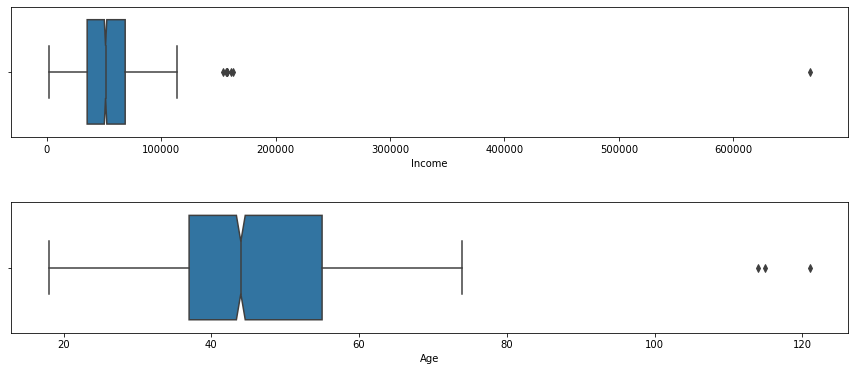

In [18]:
#Gráfica tipo 'box' para detección de outliers
fig, ax = plt.subplots(2, figsize=(15, 6))
sns.boxplot(data.Income, notch ='True', ax=ax[0])
sns.boxplot(data.Age, notch ='True', ax=ax[1])
plt.subplots_adjust(hspace=0.5)
plt.show()

In [19]:
#Eliminación de outliers
data = data[data.Income < 200000] #'Income' outlier (ID=9432)
data = data[data.Age < 90] #'Age' outlier (ID = 1150,7829,11004)

In [20]:
#Dataframe resultante
data

,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,TotalSpent,Children
ID,,,,,,,,,,,,,,,,,,,,,
5524,1,0,58138.0,2012-09-04,58,635,88,546,172,88,...,0,0,0,0,0,0,1,57,1617,0
2174,1,0,46344.0,2014-03-08,38,11,1,6,2,1,...,0,0,0,0,0,0,0,60,27,2
4141,1,1,71613.0,2013-08-21,26,426,49,127,111,21,...,0,0,0,0,0,0,0,49,776,0
6182,1,1,26646.0,2014-02-10,26,11,4,20,10,3,...,0,0,0,0,0,0,0,30,53,1
5324,1,1,58293.0,2014-01-19,94,173,43,118,46,27,...,0,0,0,0,0,0,0,33,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1,1,61223.0,2013-06-13,46,709,43,182,42,118,...,0,0,0,0,0,0,0,47,1341,1
4001,1,1,64014.0,2014-06-10,56,406,0,30,0,0,...,0,0,0,1,0,0,0,68,444,3
7270,1,0,56981.0,2014-01-25,91,908,48,217,32,12,...,0,1,0,0,0,0,0,33,1241,0


## <p style="background-color:#29285D;font-family:verdana;color:white;font-size:100%;text-align:left;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 5. Análisis exploratorio de datos </p>

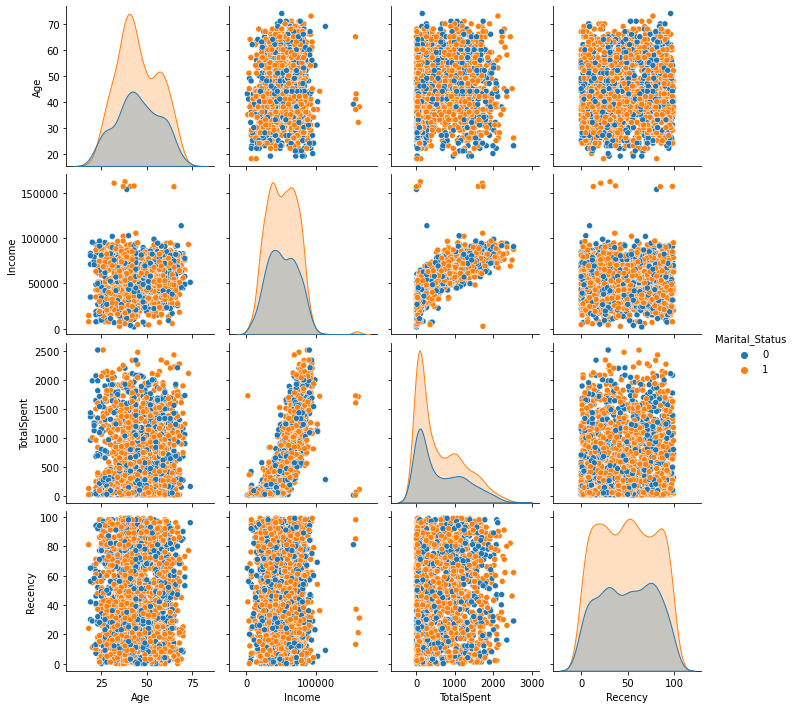

In [21]:
#Relación entre dimensiones
col = ['Age', 'Income', 'TotalSpent', 'Recency', 'Marital_Status']
sns.pairplot(data[col], hue='Marital_Status')
plt.show()

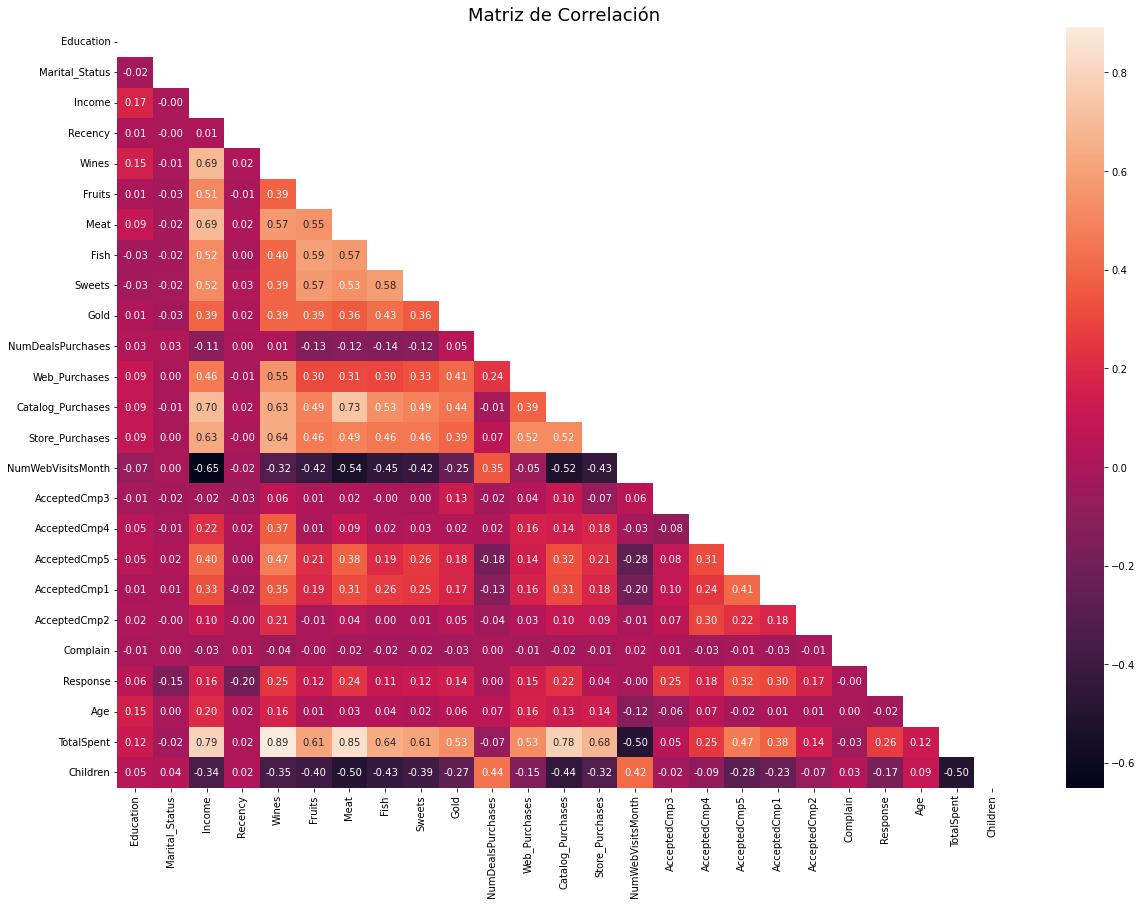

In [22]:
#Matriz de correlación por metodo "Pearson"
corr = data.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure (figsize = (20, 14))
sns.heatmap (corr, annot=True, mask=mask, fmt='.2f')
plt.title("Matriz de Correlación", fontsize=18)
plt.show()

In [23]:
corr.abs().unstack().sort_values(ascending = False)[26:65]

TotalSpent         Wines                0.892996
                   Meat                 0.845543
Meat               TotalSpent           0.845543
Income             TotalSpent           0.792740
TotalSpent         Income               0.792740
Catalog_Purchases  TotalSpent           0.780250
TotalSpent         Catalog_Purchases    0.780250
Meat               Catalog_Purchases    0.733787
Catalog_Purchases  Meat                 0.733787
Income             Catalog_Purchases    0.696589
Catalog_Purchases  Income               0.696589
Meat               Income               0.692279
Income             Meat                 0.692279
                   Wines                0.688209
Wines              Income               0.688209
TotalSpent         Store_Purchases      0.675981
Store_Purchases    TotalSpent           0.675981
Income             NumWebVisitsMonth    0.650257
NumWebVisitsMonth  Income               0.650257
TotalSpent         Fish                 0.641884
Fish               T

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    <h3 style="color:blue;padding-left:10px"><b>OBSERVACIONES:</b></h3>
       <p style="color:blue;font-size:100%;padding-left:30px">
            * Clientes con alto ingreso son quienes mas gastan<br>
            * Los productos "Meat" y "Wine" son los productos con mas alto costo<br>
            * Clientes con niños y con bajo ingreso prefieren las compras en ofertas<br>
            * Las variables "Complain" y "recency" no estan relacionadas con otras<br>
        </p>
</div>

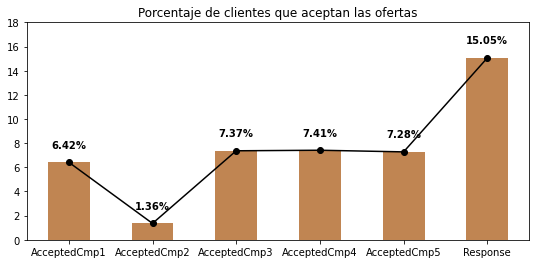

In [24]:
plt.figure(figsize=(9,4))
plt.title('Porcentaje de clientes que aceptan las ofertas')

percent = data.sum()[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]*100/len(data)

ax = percent.plot.bar(color='#c08552')
percent.plot(style='o-', colormap='copper')

plt.setp(ax, ylim=(0, 18))

for i,v in enumerate(percent):
    plt.text(i, v+1.2, '{:.2f}%'.format(v), horizontalalignment='center', weight='bold', color='Black', fontsize=10)

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    <h3 style="color:blue;padding-left:10px"><b>OBSERVACIONES:</b></h3>
       <p style="color:blue;font-size:100%;padding-left:30px">
La ultima campaña de marketing tuvo la mayor aceptación comparado con las anteriores con un 15,05% de clientes.
        </p>
</div>

## <p style="background-color:#29285D;font-family:verdana;color:white;font-size:100%;text-align:left;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 6. Preparación de datos </p>

In [25]:
#Seleccionar datos a entrenar y datos de salida
x = data[['Education', 'Marital_Status', 'Income', 'Children', 'Age', 'TotalSpent', 'Recency']]
y = data['Response']

# División de datos de entrenamiento y datos de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

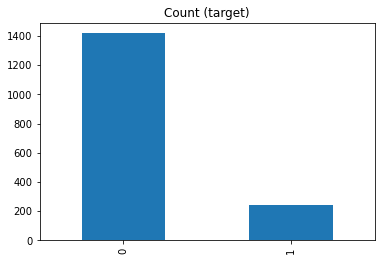

In [26]:
#Balance del set de entrenamiento
y_train.value_counts().plot (kind='bar', title='Count (target)')
plt.show()

In [27]:
c = y_train.value_counts()
p = y_train.value_counts(normalize=True)
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
0,1418,0.854732
1,241,0.145268


<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    <h3 style="color:blue;padding-left:10px"><b>OBSERVACIONES:</b></h3>
       <p style="color:blue;font-size:100%;padding-left:30px">
Se evidencia un desbalanceo en el set de entrenamiento ocupando la clase minoritaria solo un 14,52% del conjunto de datos, lo cual representa una probabilidad de falla en el funcionamiento del algoritmo a entrenar sin utilizar algun metodo de resampling.
        </p>
</div>

## <p style="background-color:#29285D;font-family:verdana;color:white;font-size:100%;text-align:left;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 7. Entrenamiento de modelos supervisados </p>

In [28]:
#Variables de resultados
Accuracy_Test=[]
Accuracy_Train=[]
KFold_Mean=[]
KFold_Std=[]

### 1. Decision Tree

In [29]:
#Instanciar el modelo
tree = DecisionTreeClassifier(max_depth=3)

In [30]:
#Entrenar el modelo
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
#Evaluación del modelo con métrica "Accuracy"
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.833634719710669


In [32]:
#Evaluación del modelo con método de validación cruzada
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.848 (0.032)


In [33]:
#Agregado al dataframe de comparación
Accuracy_Test.append(test_accuracy)
Accuracy_Train.append(train_accuracy)
KFold_Mean.append(mean(scores))
KFold_Std.append(std(scores))

### 2. Random Forest

In [34]:
#Instanciar el modelo
RandForest = RandomForestClassifier()

In [35]:
#Entrenar el modelo
RandForest.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
#Evaluación del modelo con métrica "Accuracy"
y_train_pred = RandForest.predict(x_train)
y_test_pred = RandForest.predict(x_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.8499095840867993


In [37]:
#Evaluación del modelo con método de validación cruzada
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = RandomForestClassifier()
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.864 (0.031)


In [38]:
#Agregado al dataframe de comparación
Accuracy_Test.append(test_accuracy)
Accuracy_Train.append(train_accuracy)
KFold_Mean.append(mean(scores))
KFold_Std.append(std(scores))

### 3. K-Nearest Neighborg

In [39]:
#Instanciar el modelo
knn = KNeighborsClassifier()

In [40]:
#Entrenar el modelo
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [41]:
#Evaluación del modelo con métrica "Accuracy"
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.8173598553345389


In [42]:
#Evaluación del modelo con método de validación cruzada
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = KNeighborsClassifier()
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.844 (0.030)


In [43]:
#Agregado al dataframe de comparación
Accuracy_Test.append(test_accuracy)
Accuracy_Train.append(train_accuracy)
KFold_Mean.append(mean(scores))
KFold_Std.append(std(scores))

### 4. Logistic Regression

In [44]:
#Instanciar el modelo
LR = LogisticRegression()

In [45]:
#Entrenar el modelo
LR.fit(x_train,y_train)

LogisticRegression()

In [46]:
#Evaluación del modelo con métrica "Accuracy"
y_train_pred = LR.predict(x_train)
y_test_pred = LR.predict(x_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.8426763110307414


In [47]:
#Evaluación del modelo con método de validación cruzada
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.855 (0.022)


In [48]:
#Agregado al dataframe de comparación
Accuracy_Test.append(test_accuracy)
Accuracy_Train.append(train_accuracy)
KFold_Mean.append(mean(scores))
KFold_Std.append(std(scores))

### 5. Support Vector Machine

In [49]:
#Instanciar el modelo
SVC = SVC(C=10)

In [50]:
#Entrenar el modelo
SVC.fit(x_train,y_train)

SVC(C=10)

In [51]:
#Evaluación del modelo
y_train_pred = SVC.predict(x_train)
y_test_pred = SVC.predict(x_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.833634719710669


In [52]:
#Evaluación del modelo con método de validación cruzada
clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, x, y, cv=10)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.812 (0.027)


In [53]:
#Agregado al dataframe de comparación
Accuracy_Test.append(test_accuracy)
Accuracy_Train.append(train_accuracy)
KFold_Mean.append(mean(scores))
KFold_Std.append(std(scores))

### 6. Evaluación de modelos

In [54]:
#Dataframe de comparación
ModSup1 = pd.DataFrame(Accuracy_Test,index=['DecTree','RanForest','kNN','LogReg','SVM'], columns=['Accuracy_Test'])
ModSup1['Accuracy_Train']=Accuracy_Train
ModSup1['KFold_Mean']=KFold_Mean
ModSup1['KFold_Std']=KFold_Std
ModSup1.T

,DecTree,RanForest,kNN,LogReg,SVM
Accuracy_Test,0.833635,0.849910,0.817360,0.842676,0.833635
Accuracy_Train,0.870404,0.992164,0.880048,0.852923,0.854732
KFold_Mean,0.848082,0.864351,0.844012,0.855322,0.811964
KFold_Std,0.032013,0.030547,0.029678,0.022423,0.027430


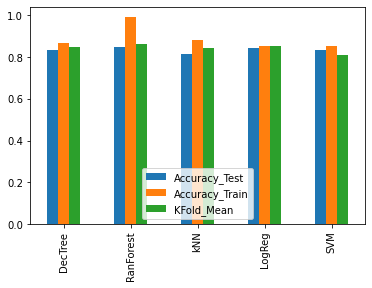

In [55]:
axes = ModSup1[['Accuracy_Test','Accuracy_Train','KFold_Mean']].plot.bar()

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    <h3 style="color:blue;padding-left:10px"><b>OBSERVACIONES:</b></h3>
       <p style="color:blue;font-size:100%;padding-left:30px">
Entrenamos y evaluamos varios modelos seleccionados en sus versiones predeterminadas consiguiendo valores con diferentes metricas de validación bastante aceptables, y dentro de los mejores por su eficacia y baja diferencia entre el accuracy del train y del test, se ve como mejor opción el algoritmo de Regresión Logística.
        </p>
</div>

## <p style="background-color:#29285D;font-family:verdana;color:white;font-size:100%;text-align:left;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 8. Optimización de parámetros </p>

In [56]:
#Definición de valores por algoritmo

#Árboles de decisión
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
tree_grid = dict(criterion=criterion, max_depth=max_depth)

#Random Forest
n_estimators = [10, 100, 1000,10000]
max_features = ['sqrt', 'log2']
rf_grid = dict(n_estimators=n_estimators, max_features=max_features)

#K-Nearest Neighborg
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
knn_grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)

#Regresión logística
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
weight = ['none', 'dict', 'balanced']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_grid = dict(solver=solvers, penalty=penalty, class_weight=weight,C=c_values)

#Máquina de vector soporte
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
svc_grid = dict(kernel=kernel, C=C, gamma=gamma)## <p style="background-color:#29285D;font-family:verdana;color:white;font-size:100%;text-align:left;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 5. Análisis exploratorio de datos </p>

In [57]:
models = [tree,RandForest,knn,LR,SVC]
grids = [tree_grid,rf_grid,knn_grid,lr_grid,svc_grid]
col = 0

#Dataframe de resultados
ModSup2 = pd.DataFrame(columns=['DecTree','RanForest','kNN','LogReg','SVM'])
ModSup2.loc['GridSearch'] = [0,0,0,0,0]
ModSup2.loc['RandomSearch'] = [0,0,0,0,0]

In [58]:
#Optimización con GridSearchCV para cada modelo

col = 0
for ind in range(0,len(models)):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=models[col], param_grid=grids[col], n_jobs=-1, cv=cv,  
                               scoring='accuracy', error_score=0)
    grid_acc = grid_search.fit(x_train, y_train)
    ModSup2.iloc[0,col] = grid_acc.score(x_test,y_test)
    col += 1

In [59]:
#Optimización con RandomSearchCV para cada modelo

col = 0
for ind in range(0,len(models)):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_iter_search = 3
    random_search = RandomizedSearchCV(models[col], param_distributions=grids[col],
                                       n_iter=n_iter_search, cv=cv)
    random_search.fit(x_train,y_train)
    ModSup2.iloc[1,col] = random_search.score(x_test,y_test)
    col += 1

In [60]:
#Resultados
ModSup2

,DecTree,RanForest,kNN,LogReg,SVM
GridSearch,0.835443,0.83906,0.83906,0.83906,0.833635
RandomSearch,0.835443,0.842676,0.835443,0.703436,0.833635


In [61]:
#Comparación de metricas
ModSup = pd.concat([ModSup1.T, ModSup2])
ModSup

,DecTree,RanForest,kNN,LogReg,SVM
Accuracy_Test,0.833635,0.84991,0.81736,0.842676,0.833635
Accuracy_Train,0.870404,0.992164,0.880048,0.852923,0.854732
KFold_Mean,0.848082,0.864351,0.844012,0.855322,0.811964
KFold_Std,0.032013,0.030547,0.029678,0.022423,0.02743
GridSearch,0.835443,0.83906,0.83906,0.83906,0.833635
RandomSearch,0.835443,0.842676,0.835443,0.703436,0.833635


<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    <h3 style="color:blue;padding-left:10px"><b>OBSERVACIONES:</b></h3>
       <p style="color:blue;font-size:100%;padding-left:30px">
Si revisamos la cuadrícula de resultados, encontramos que la aplicación de técnicas de búsqueda automatizada no ha dado mejoras significantes, y considerando el alto uso de recursos de hardware, tomamos como mejor resultado el entrenamiento del algoritmo de Regresion Logistica en su versión predeterminada, con la menor diferencia entre la precisión del modelo de entrenamiento y el de prueba, y con buen accuracy de 84% - 86%.
        </p>
</div>

## <p style="background-color:#29285D;font-family:verdana;color:white;font-size:100%;text-align:left;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 9. Evaluación del algoritmo seleccionado </p>

In [62]:
#Algoritmo escogido con mejor resultado
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_train_pred = LR.predict(x_train)
y_test_pred = LR.predict(x_test)

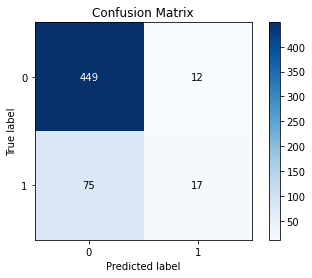

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       461
           1       0.59      0.18      0.28        92

    accuracy                           0.84       553
   macro avg       0.72      0.58      0.60       553
weighted avg       0.81      0.84      0.81       553



In [63]:
#Matriz de confusión
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, figsize=(6,4))
plt.show()
print (classification_report(y_test, y_test_pred))

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    <h3 style="color:blue;padding-left:10px"><b>OBSERVACIONES:</b></h3>
       <p style="color:blue;font-size:100%;padding-left:30px">
A pesar del buen accuracy del algoritmo escogido, la matriz de confusión junto a las metricas, nos demuestra el problema acarreado por el desbalanceo del set de datos, ya que el algoritmo solo detecta 18% de los casos positivos, siendo los mas relevantes del estudio.
        </p>
</div>

In [64]:
#Modificación del algoritmo balanceando clases dentro del mismo
LR = LogisticRegression(class_weight="balanced")
LR.fit(x_train,y_train)
y_train_pred = LR.predict(x_train)
y_test_pred = LR.predict(x_test)

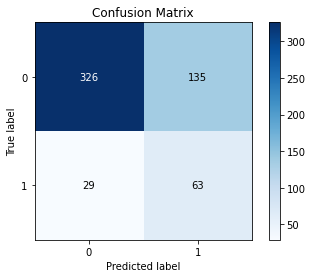

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       461
           1       0.32      0.68      0.43        92

    accuracy                           0.70       553
   macro avg       0.62      0.70      0.62       553
weighted avg       0.82      0.70      0.74       553



In [65]:
#Nueva matriz de confusión
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, figsize=(6,4))
plt.show()
print (classification_report(y_test, y_test_pred))

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    <h3 style="color:blue;padding-left:10px"><b>OBSERVACIONES:</b></h3>
       <p style="color:blue;font-size:100%;padding-left:30px">
Utilizamos una de las técnicas para trabajar con el desbalanceo de clases llamada penalización, donde se agregó un parámetro adicional en el modelo de Regresión Logística, no incluido en el hypertunning para poder estudiar sus consecuencias y tratamientos, y con esto el algoritmo se encargó de equilibrar a la clase minoritaria durante el entrenamiento, observando como resultado un incremento en la detección de verdaderos positivos pero sacrificando la detección de verdaderos negativos.
        </p>
</div>

## <p style="background-color:#29285D;font-family:verdana;color:white;font-size:100%;text-align:left;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 10. Conclusión </p>

<div class="Conclusion" style="font-size:16px; font-family:verdana; line-height: 1.7em;">
<p style="color:black; font-size:100%; padding-left:30px">
Se construyó un algoritmo de Regresión Logística para predecir los clientes potenciales en aceptar las campañas de marketing ofrecidas por la empresa, con una acertividad del 70% la cual se puede mejorar usando otras técnicas de balanceo del set de datos.</p>
<p style="color:black; font-size:100%; padding-left:30px">Luego se recomienda usar un algoritmo no supervisado asi segmentar los clientes por sus características y lograr enfocar de mejor manera y sin malgastar esfuerzos las estrategias de ventas conociendo ya los perfiles a los cuales acceder, y el uso de ambos algoritmos en conjunto subirá en gran medida esta eficacia.</p>
</div>